## Computer Vision for Bread Toasting Level Classification

The goal of this notebook is to provide a prototype of a system that can classify the toasting level of bread. The system will be based on the color of the bread, which will be represented in the CIEL*a*b* color space.


We'll try to remove the background from the images, convert them to Cielab and then calculate the color histograms.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def masked_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 30, 40)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=3)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    # plt.figure(figsize=(6, 4))
    # plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()
    return masked_image

In [4]:
def cielab_from_masked_image(image_path):
    masked = masked_image(image_path)
    img_lab = cv2.cvtColor(masked, cv2.COLOR_BGR2Lab)
    # l_channel, a_channel, b_channel = cv2.split(img_lab)
    # 
    # plt.figure(figsize=(10, 10))
    # 
    # plt.subplot(1, 3, 1)
    # plt.imshow(l_channel, cmap='gray')
    # plt.title(image_path.split('/')[-1] + ': Channel L*')
    # 
    # plt.subplot(1, 3, 2)
    # plt.imshow(a_channel, cmap='gray')
    # plt.title('Channel a*')
    # 
    # plt.subplot(1, 3, 3)
    # plt.imshow(b_channel, cmap='gray')
    # plt.title('Channel b*')
    # 
    # plt.show()
    
    return img_lab

In [2]:
import os
root_images_dir = 'toasted_bread_dataset/'
dataset_paths = [root_images_dir + image_path for image_path in os.listdir(root_images_dir)]
dataset_paths

['toasted_bread_dataset/pan1 sin tostar.jpg',
 'toasted_bread_dataset/pan2 tostado bis.jpg',
 'toasted_bread_dataset/pan2 sin tostar.jpg',
 'toasted_bread_dataset/pan1 tostado bis.jpg',
 'toasted_bread_dataset/pan2 tostado.jpg',
 'toasted_bread_dataset/pan2 medio tostado.jpg',
 'toasted_bread_dataset/pan1 tostado.jpg',
 'toasted_bread_dataset/pan1 medio tostado.jpg']

Now we'll calculate the color histograms for the masked images in the CIEL*a*b* color space removing the background from the images.

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def plot_cielab_histogram_for_masked_image(cielab_image):
    mask = np.all(cielab_image != [0, 0, 0], axis=-1)

    L_channel, a_channel, b_channel = cv2.split(cielab_image)

    L_channel_masked = L_channel[mask]
    a_channel_masked = a_channel[mask]
    b_channel_masked = b_channel[mask]

    plt.figure(figsize=(10, 5))
    color = ['black', 'green', 'blue']
    labels = ['L*', 'a*', 'b*']

    for i, channel in enumerate([L_channel_masked, a_channel_masked, b_channel_masked]):
        plt.hist(channel, bins=256, range=(0, 256), color=color[i], alpha=0.5, label=labels[i])

    plt.title('Color Histogram in CIELAB Color Space for Masked Image')
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.legend()
    plt.xlim([0, 256])
    plt.show()

toasted_bread_dataset/pan1 sin tostar.jpg


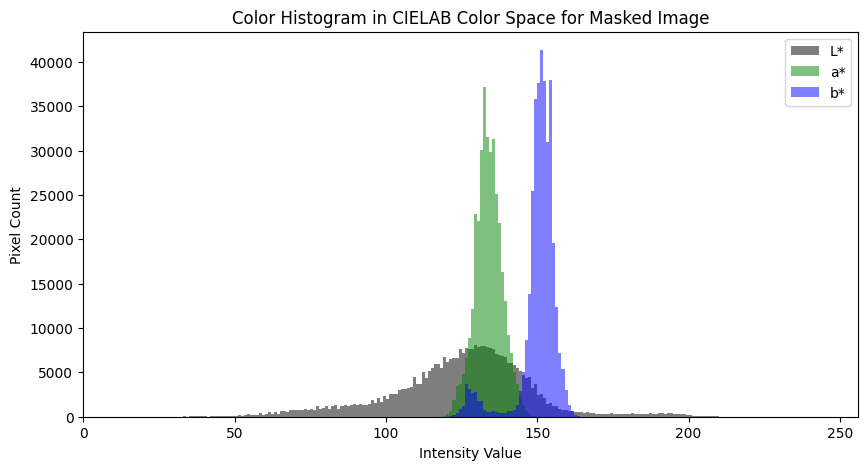

toasted_bread_dataset/pan2 tostado bis.jpg


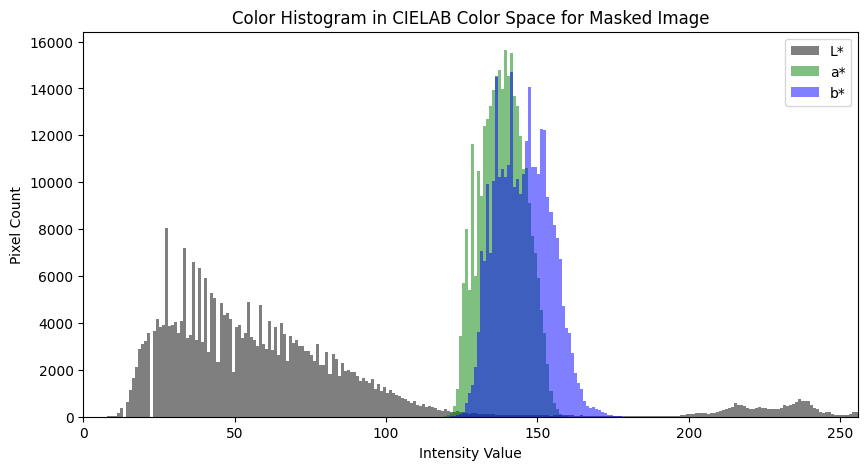

toasted_bread_dataset/pan2 sin tostar.jpg


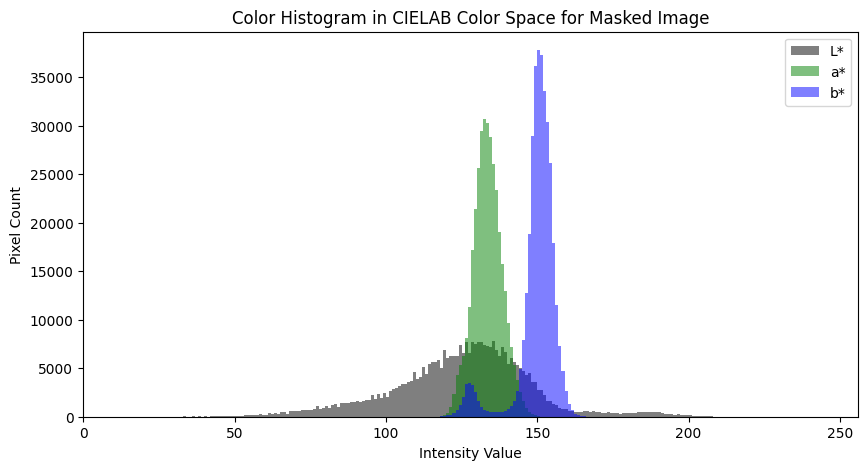

toasted_bread_dataset/pan1 tostado bis.jpg


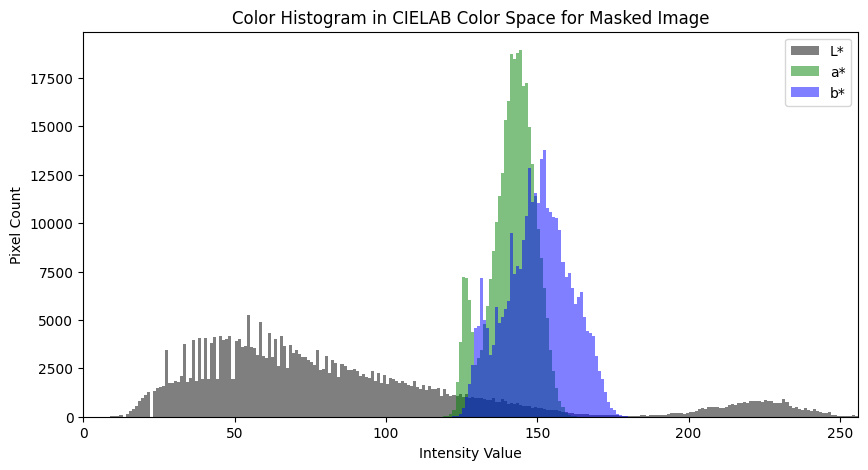

toasted_bread_dataset/pan2 tostado.jpg


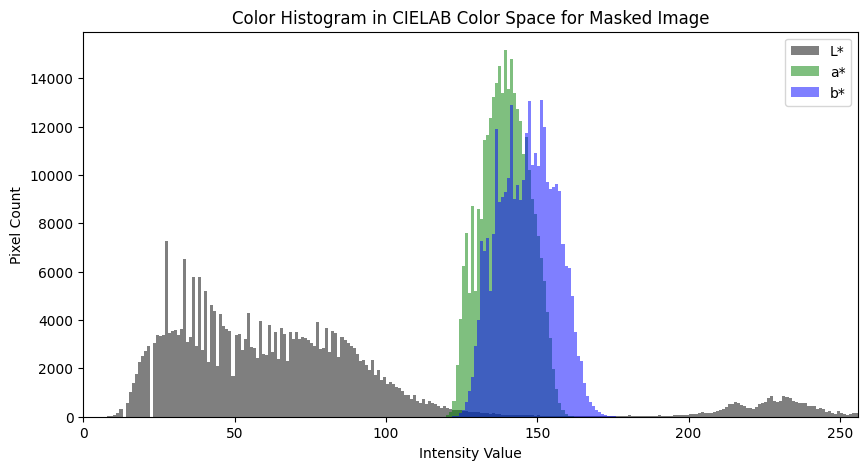

toasted_bread_dataset/pan2 medio tostado.jpg


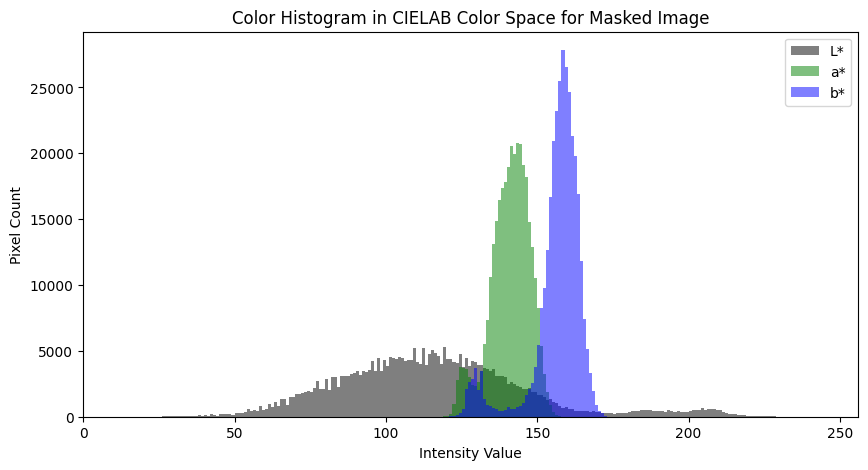

toasted_bread_dataset/pan1 tostado.jpg


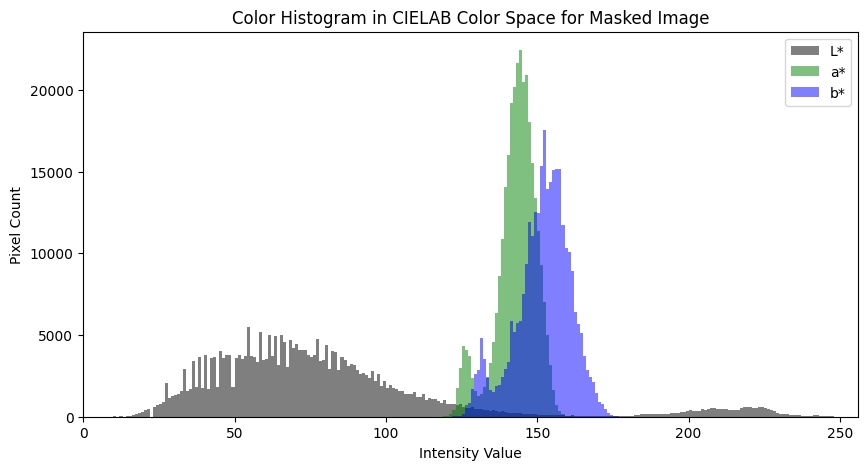

toasted_bread_dataset/pan1 medio tostado.jpg


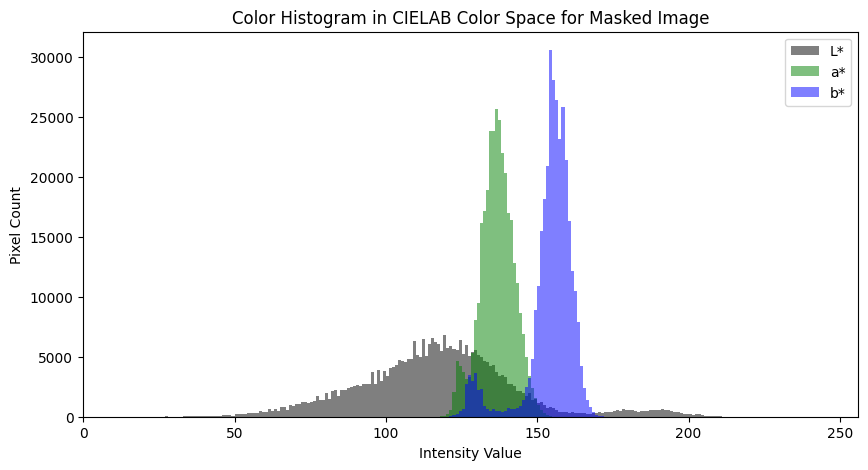

In [14]:
for image_path in dataset_paths:
        print(image_path)
        cielab_image = cielab_from_masked_image(image_path)
        plot_cielab_histogram_for_masked_image(cielab_image)

In [16]:
def mask_img(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 30, 40)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(gray, dtype=np.uint8)
    cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=3)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image

In [17]:
def convert_to_cielab(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [18]:
def histogram(cielab_image):
    mask = np.all(cielab_image != [0, 0, 0], axis=-1)
    histograms = []
    for i in range(3):  # For L*, a*, and b* channels
        channel = cielab_image[:, :, i][mask]
        hist, _ = np.histogram(channel, bins=256, range=(0, 256))
        histograms.append(hist)
    return histograms

In [19]:
def histograms_of_masked_img(path):
    masked_image = mask_img(path)
    cielab_image = convert_to_cielab(masked_image)
    return histogram(cielab_image)

In [20]:
path = dataset_paths[0]
histograms_of_masked_img(path)

[array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    3,    0,    1,    1,    2,    2,    4,    3,    2,    5,
           0,    1,    3,    4,    5,   16,    8,   12,   13,   16,   14,
          33,   18,   33,   47,   26,   63,   27,   62,   22,   77,   79,
          41,  110,   96,  123,  119,   80,  118,  153,  133,  170,  272,
         177,  225,  205,  411,  248,  271,  507,  333,  505,  363,  629,
         643,  490,  763,  710,  808,  703,  752,  817,  793,  840,  757,
        1217,  852,  978, 1171,  901, 1224, 1336,  918, 1230, 1265, 1252,
        1278, 1429, 1343, 1405, 1342, 1332, 1464, 1930, 1528, 2142, 1667,
        2316, 1988, 2532, 2541, 2607, 3003, 3107, 3108, 3192, 3337, 4456,
        3716, 3664, 4999, 4402, 5169, 5530, 5987, 5957, 5525, 6691, 6221,
        6478, 6664, 6630, 7639, 7170, 7724, 7581, 7622, 8120, 7903, 8007,
        8000, 7847, 7729, 7688, 7044, 7012, 6813, 6741, 6102, 6090, 5819,
        5491, 5188, 4718, 4342, 4511, 

In [35]:
def compare_histograms(hist1, hist2, method=cv2.HISTCMP_CORREL):
    hist1 = [h.astype(np.float32) for h in hist1]
    hist2 = [h.astype(np.float32) for h in hist2]
    similarities = [cv2.compareHist(h1, h2, method) for h1, h2 in zip(hist1, hist2)]
    return sum(similarities) / len(similarities)

def find_most_similar(histograms, reference_histograms, method=cv2.HISTCMP_CORREL):
    similarities = [compare_histograms(histograms, ref_hist, method) for ref_hist in reference_histograms]
    most_similar_index = similarities.index(max(similarities))
    return most_similar_index

In [38]:
your_histograms = histograms_of_masked_img('toasted_bread_dataset/pan1 medio tostado.jpg')

reference_histograms = [
    histograms_of_masked_img('toasted_bread_dataset/pan2_medio_tostado.jpg'),
    histograms_of_masked_img('toasted_bread_dataset/pan2_sin_tostar.jpg'),
    histograms_of_masked_img('toasted_bread_dataset/pan2_tostado.jpg')
]

most_similar_index = find_most_similar(your_histograms, reference_histograms)
print(f"The most similar reference image is at index: {most_similar_index}")

The most similar reference image is at index: 0
